# Problem 1

In [8]:
import requests
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt 
import datetime
import zipfile
os.getcwd()

'c:\\Users\\cnb\\Desktop\\Midterm'

In [7]:
ADI = pd.read_csv("data/ADI.csv")
CPT = pd.read_csv("data/CPT.csv")
HSY = pd.read_csv("data/HSY.csv")
TER = pd.read_csv("data/TER.csv")

ADI

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,90.209999,89.000000,89.360001,90.029999,2428800.0,81.709259
1,2017-11-14,90.489998,89.400002,89.790001,90.440002,2172600.0,82.081390
2,2017-11-15,89.949997,88.669998,89.580002,89.160004,2250500.0,80.919693
3,2017-11-16,90.750000,89.410004,89.790001,90.480003,2297900.0,82.117683
4,2017-11-17,91.050003,90.239998,91.000000,90.419998,2342900.0,82.063225
...,...,...,...,...,...,...,...
1254,2022-11-07,149.190002,143.880005,145.809998,148.929993,3981600.0,148.929993
1255,2022-11-08,155.600006,150.029999,151.139999,151.039993,4968300.0,151.039993
1256,2022-11-09,150.839996,147.589996,149.139999,148.229996,3696300.0,148.229996
1257,2022-11-10,160.759995,154.500000,155.910004,160.369995,5617300.0,160.369995


In [31]:
companies = {"ADI":ADI, "CPT":CPT, "HSY":HSY, "TER":TER}

### 1.

In [32]:
for name, df in companies.items():
    if sum(df["Close"] == df["Adj Close"]) == df.shape[0]:
        print(f"For {name} "Close = Adj Close" holds")

No such firm. Adjusted closing price takes dividends, stock splits, and new stock offerings into account while closing price does not.

### 2.

In [33]:
for name, df in companies.items():
    max_price = df["Adj Close"].max()
    print(f"For {name} maximum is {max_price}")

For ADI maximum is 185.4065399169922
For CPT maximum is 175.0821990966797
For HSY maximum is 239.9600067138672
For TER maximum is 168.55999755859375


In [66]:
for name, df in companies.items():
    min_price = df["Adj Close"].min()
    print(f"For {name} minimum is {min_price}")

For ADI minimum is 72.05250549316406
For CPT minimum is 62.04124069213867
For HSY minimum is 81.89292907714844
For TER minimum is 28.534400939941406


### 3.
Assuming that log-returns are 100*log-difference which is close to d-o-d percentage change (I have not taken much finance classes)

In [43]:
for name, df in companies.items():
    df["log_price"] = np.log(df["Adj Close"])
    df["log_return"] = 100*(df["log_price"] - df["log_price"].shift(1))

In [65]:
for name, df in companies.items():
    a = df["log_return"].max()
    b = df["log_return"].min()
    c = np.mean(df["log_return"])
    d = np.median(df["log_return"])

    print(f"For {name}: maximum is {a}, minimum is {b}, mean is {c}, median is {d}")

For ADI: maximum is 13.713043616266418, minimum is -18.170058285539348, mean is 0.055410562367966466, median is nan
For CPT: maximum is 10.530495957793296, minimum is -19.7122651576791, mean is 0.027852598080332035, median is nan
For HSY: maximum is 9.946689637422512, minimum is -18.06550772538351, mean is 0.06412558899940428, median is nan
For TER: maximum is 18.633376200631524, minimum is -25.373865703878806, mean is 0.06451291941239515, median is nan


### 4.

In [74]:
for name, df in companies.items():
    max_gain_index = df["log_return"].idxmax()
    max_gain_date = df["Date"][max_gain_index]

    print(f"For {name} maximum occured on {max_gain_date}, index {max_gain_index}")

For ADI maximum occured on 2020-03-17, index 587
For CPT maximum occured on 2020-04-06, index 601
For HSY maximum occured on 2020-03-17, index 587
For TER maximum occured on 2019-07-24, index 424


In [76]:
for name, df in companies.items():
    max_loss_index = df["log_return"].idxmin()
    max_loss_date = df["Date"][max_loss_index]

    print(f"For {name} minimum occured on {max_loss_date}, index {max_loss_index}")

For ADI minimum occured on 2020-03-16, index 586
For CPT minimum occured on 2020-03-16, index 586
For HSY minimum occured on 2020-03-18, index 588
For TER minimum occured on 2022-01-27, index 1058


### 5.

### 6.

### 7.

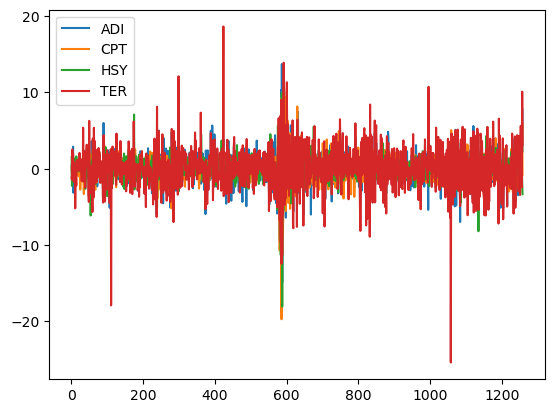

In [37]:
for name, df in companies.items():
    df["log_return"].plot(label = name)
plt.legend()
plt.show()

### 8.

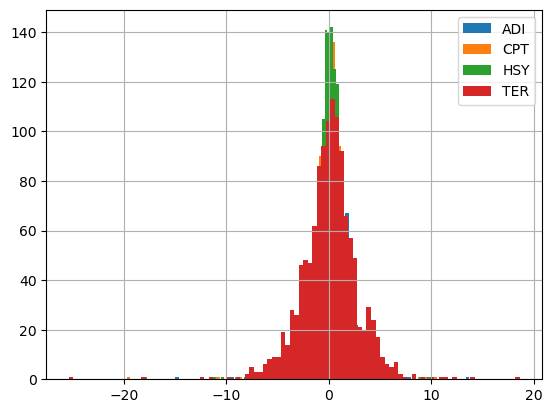

In [38]:
for name, df in companies.items():
    df["log_return"].hist(bins = 100, label = name)
plt.legend()
plt.show()

# Problem 2

In [5]:
df = pd.read_csv("data/companies_no_subindustry.csv")
df

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


### 1.

In [78]:
not_included = df["included"].isnull().sum()
print(f"Total of {not_included} are not included")

Total of 45 are not included


### 2.

In [11]:
df["included"] = pd.to_datetime(df["included"], dayfirst=True,errors='coerce')

dfb = df.loc[df.included.notnull()].copy().reset_index(drop = True)

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981
...,...,...,...,...,...,...
452,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997
453,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969
454,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927
455,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873


In [15]:
dfb.loc[dfb.included == dfb.included.min()]

,Symbol,Security,GICS_Sector,hq,included,Founded
25,MO,Altria,Consumer Staples,"Richmond, Virginia",1957-03-04,1985
30,AEP,American Electric Power,Utilities,"Columbus, Ohio",1957-03-04,1906
70,BA,Boeing,Industrials,"Chicago, Illinois",1957-03-04,1916
75,BMY,Bristol Myers Squibb,Health Care,"New York City, New York",1957-03-04,1989
84,CPB,Campbell Soup Company,Consumer Staples,"Camden, New Jersey",1957-03-04,1869
91,CAT,Caterpillar Inc.,Industrials,"Irving, Texas",1957-03-04,1925
103,CVX,Chevron Corporation,Energy,"San Ramon, California",1957-03-04,1879
116,KO,The Coca-Cola Company,Consumer Staples,"Atlanta, Georgia",1957-03-04,1886
118,CL,Colgate-Palmolive,Consumer Staples,"New York City, New York",1957-03-04,1806
122,COP,ConocoPhillips,Energy,"Houston, Texas",1957-03-04,2002


In [16]:
dfb.loc[dfb.included == dfb.included.max()]

,Symbol,Security,GICS_Sector,hq,included,Founded
47,ACGL,Arch Capital Group,Financials,"Hamilton, Bermuda",2022-11-01,1995


### 3.

### 4.

### 5.

In [18]:
dfc = pd.read_csv("data/companies_subindustry.csv")
dfc

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [20]:
df_merged = dfb.merge(dfc, on = 'Symbol')
df_merged

,Symbol,Security,GICS_Sector,hq,included,Founded,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,Health Care Equipment
...,...,...,...,...,...,...,...
452,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997,Restaurants
453,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969,Electronic Equipment & Instruments
454,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927,Health Care Equipment
455,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873,Regional Banks
